Last updated: 22nd Jan 22.

This notebook was created for Peem's ADA project advised by Nynke, Larry, and Rema.

# Questions 

## Broad
1. Some of the fields collected do not reflect the current status of the video (such as viewCount, likeCount, dislikeCount, etc.). Is each entry collected around similar period? If not, how does that affect the result of our analysis?



##  Specific
1. What's the difference between dislikeCount and dislikeCount.1?
2. 

## Request
1. Source code for previous projects. 

## TODO
1. D

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
# Checking the status of the download.
df = pd.read_csv("Youtube_Data_V4.csv")
df

,id,publishedAt,viewCount,likeCount,dislikeCount,dislikeCount.1,comment,title,description,contentDuration,...,neg,neu,pos,summary_word_Count,transition_word_Count,verb_count,active_verbs_count,passive_verb_count,description_sentence_count,unique_words_description
0,bJKCEKCOeTw,2014-06-11T20:27:24.000Z,5726,27,1,1,NaN,120-Overview of Diseases of Lipid Metabolism,Importance of lipid metabolism general overvie...,267,...,0,0,0,0,0,0.0,0.0,0.0,1,7
1,PBB4SHQHTbY,2013-07-17T21:35:13.000Z,40836,258,14,14,"Aweesomee job', 'woow!', '', 'Goood'",Fatty Acids and Disease in Type 2 Diabetes,This animation helps the learner to understand...,260,...,0,1,0,0,0,6.0,4.0,1.0,2,31
2,9zb0Oo0ryEI,2013-07-16T21:37:15.000Z,29510,206,5,5,By entering your blood test results and answer...,How Lipoproteins Affect Metabolism in Diabetes,There is a strong connection between type 2 di...,398,...,0.058,0.644,0.298,0,1,6.0,3.0,3.0,3,42
3,97uiV4RiSAY,2009-08-17T19:22:12.000Z,462414,2534,45,45,"hola chicos que tal', 'thank u so much perfect...",Physiology of Lipoprotein Metabolism,Reducing the Atherogenic Burden Molecular Dise...,477,...,0.061,0.694,0.244,0,1,1.0,1.0,0.0,1,18
4,m-PozFAV1xE,2016-11-07T20:12:47.000Z,7263,104,3,3,"Great!', 'Thank You so much Sir. You are great...",INTRACELLULAR ACCUMULATIONS: LIPIDS- Fatty Change,A series of video tutorials discussing the top...,870,...,0,0.544,0.456,0,2,15.0,12.0,2.0,6,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11113,LedWl2QTy40,2017-10-17T10:25:05.000Z,3097,40,2,2,"#healthylife365 i see, it is useful, thank you...",Is Meat Good For Diabetes || Diabetes Diet Plan,Watch Drink Daily Sugar Free Tea Coffee For Di...,119,...,0,0.491,0.509,0,5,121.0,88.0,15.0,22,256
11114,GNghXeGlTdI,2017-02-12T14:44:27.000Z,9296,106,7,7,Get my diabetes diet and management guide here...,10 Best Fiber Foods for Diabetes,Practical information about Diabetes Self Mana...,684,...,0,0.801,0.199,0,7,100.0,82.0,3.0,33,290
11115,d360OEFeVAQ,2017-09-26T10:30:00.000Z,2387,49,2,2,Here is the fastest method to cure diabetes: *...,Drink Daily Sugar Free Tea & Coffee For Diabetics,This animation helps the learner to understand...,167,...,0,0.811,0.189,0,7,117.0,75.0,8.0,1,6
11116,QTcNp2JRgoU,2015-11-29T01:17:27.000Z,1701,28,1,1,NaN,Medication Resistance vs Insulin Resistance,NaN,401,...,0,0,0,0,0,0.0,0.0,0.0,2,31


# Description of each variable.
1. id = youtube.com/watch = [insert id]
2. publishedAt: Concatenated string format >> TODO: Parse
3. (Quant)  'viewCount', 'likeCount', 'dislikeCount', 'dislikeCount.1'
       Some Count(s) have text inputs even though they should be quantitative.
4. TODO: dislikeCount and dislikeCount.1 mostly the same.
5. title = Title of the Youtube video.
6. comment = Scrapes all comments made in each video, separated by comma ("Comment 1","Comment 2"...)
7. description = Description of the video made by content creator
8. (Quant) contentDuration = Duration of videos in second
9. keyword ???: How is the keyword detected? Say, video 1 has abnormal, fat, metabolism.
10. rank ???: What is it exactly? It seems to be repeating sequence of 1,2,3,...49. 
11. channelTitle = Name of channel
12. (Quant) channelSubscriberCount = Number of subscribers for the channel.
13. contentDimension: Almost all (11095) of them 2d. Some fields = 42. Some texts?
14. contentDefinition: Mostly hd or sd. Some texts?
15. contentCaption: Youtube already auto-generates caption, so what does this field mean? Also, Video 1 has caption, but the input says false.
16. (Quant) totalwords_description: How many words appear on description.
(See wiki)
17. (Quant) Flesh_kincaid_Grade: Is actually flesch-kincaid grade, a metric that evaluates how difficult a passage is to understand (how did you obtain this number?)
18. (Quant) Automated_Readability_Index: a readability test for English texts, designed to gauge the understandability of a text
( Etc.)
19. (Quant) neg, neu, pos: How are they calculated? Should sum up to 1. 
20. (Quant) 'summary_word_Count', 'transition_word_Count', 'verb_count','active_verbs_count', 'passive_verb_count',
'description_sentence_count': How do you define each of the counts? Are they for description? Do you have a corpus of words falling into each category? 
21. unique_words_description': How many unique words appear in the description. 

In [47]:
# Print column names to check later.
df.columns
df["transition_word_Count"].head()

Index(['id', 'publishedAt', 'viewCount', 'likeCount', 'dislikeCount',
       'dislikeCount.1', 'comment', 'title', 'description', 'contentDuration',
       'keyword', 'rank', 'channelTitle', 'channelSubscriberCount',
       'channelDescription', 'channelViewCount', 'channelVideoCount',
       'contentDimension', 'contentDefinition', 'contentCaption',
       'totalwords_description', 'Flesh_kincaid_Grade',
       'Automated_Readability_Index', 'neg', 'neu', 'pos',
       'summary_word_Count', 'transition_word_Count', 'verb_count',
       'active_verbs_count', 'passive_verb_count',
       'description_sentence_count', 'unique_words_description',
       'viewCountStatus', 'likeCountStatus', 'dislikeCountStatus',
       'dislikeCount.1Status'],
      dtype='object')

In [86]:
df["transition_word_Count"].head()

0    0
1    0
2    1
3    1
4    2
Name: transition_word_Count, dtype: object

In [27]:
# Define functions to help with data cleaning, detection process. 
# TODO: Top-down design which functions are needed for cleaning purpose. 

def length_over_thresh(thresh, text):
    # Usage: on apply.
    # Count if the length of each field exceeds the expected length.
    if len(str(text)) >= thresh:
        return True
    return False

def publishedAtparser(date):
    # TODO: Implement
    # Usage: Take in the input of text length. Return a list of integers corresponding to month, date, year.
    pass

def checkQuant(text):
    # Usage: Check if the input is a quantitative variable (that is, made into a text).
    # Return: True, if the field is quantitative (can be converted to a float). False otherwise. 
    try:
        text = float(text)
        return True
    except:
        return False       

In [97]:
# PART 1: Check if quantitative variables are actually quantitative. 

# Classifying each quantitative variables by itself.
qvldcount = ['viewCount', 'likeCount', 'dislikeCount', 'dislikeCount.1']
qmetadata = ["contentDuration", "channelSubscriberCount", "totalwords_description"]
qreadability = ["Flesh_kincaid_Grade", "Automated_Readability_Index"]
qsentiment = ["neg", "neu", "pos"]
qdescription = ["totalwords_description", 'summary_word_Count', 'transition_word_Count', 'verb_count']
qdescription += ['active_verbs_count', 'passive_verb_count','description_sentence_count']

# Total = list of all quantitative variables names. 
total = qvldcount + qmetadata + qreadability + qsentiment + qdescription 

# Checking if each quantitative variable actually holds the correct type. 
for colname in total:
    df[colname + "isQuant"] = df.apply(lambda row: checkQuant(row[colname]), axis = 1)

TypeError: can only concatenate list (not "str") to list

In [98]:
df

,id,publishedAt,viewCount,likeCount,dislikeCount,dislikeCount.1,comment,title,description,contentDuration,...,Automated_Readability_IndexisQuant,negisQuant,neuisQuant,posisQuant,summary_word_CountisQuant,transition_word_CountisQuant,verb_countisQuant,active_verbs_countisQuant,passive_verb_countisQuant,description_sentence_countisQuant
0,bJKCEKCOeTw,2014-06-11T20:27:24.000Z,5726,27,1,1,NaN,120-Overview of Diseases of Lipid Metabolism,Importance of lipid metabolism general overvie...,267,...,True,True,True,True,True,True,True,True,True,True
1,PBB4SHQHTbY,2013-07-17T21:35:13.000Z,40836,258,14,14,"Aweesomee job', 'woow!', '', 'Goood'",Fatty Acids and Disease in Type 2 Diabetes,This animation helps the learner to understand...,260,...,True,True,True,True,True,True,True,True,True,True
2,9zb0Oo0ryEI,2013-07-16T21:37:15.000Z,29510,206,5,5,By entering your blood test results and answer...,How Lipoproteins Affect Metabolism in Diabetes,There is a strong connection between type 2 di...,398,...,True,True,True,True,True,True,True,True,True,True
3,97uiV4RiSAY,2009-08-17T19:22:12.000Z,462414,2534,45,45,"hola chicos que tal', 'thank u so much perfect...",Physiology of Lipoprotein Metabolism,Reducing the Atherogenic Burden Molecular Dise...,477,...,True,True,True,True,True,True,True,True,True,True
4,m-PozFAV1xE,2016-11-07T20:12:47.000Z,7263,104,3,3,"Great!', 'Thank You so much Sir. You are great...",INTRACELLULAR ACCUMULATIONS: LIPIDS- Fatty Change,A series of video tutorials discussing the top...,870,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11113,LedWl2QTy40,2017-10-17T10:25:05.000Z,3097,40,2,2,"#healthylife365 i see, it is useful, thank you...",Is Meat Good For Diabetes || Diabetes Diet Plan,Watch Drink Daily Sugar Free Tea Coffee For Di...,119,...,True,True,True,True,True,True,True,True,True,True
11114,GNghXeGlTdI,2017-02-12T14:44:27.000Z,9296,106,7,7,Get my diabetes diet and management guide here...,10 Best Fiber Foods for Diabetes,Practical information about Diabetes Self Mana...,684,...,True,True,True,True,True,True,True,True,True,True
11115,d360OEFeVAQ,2017-09-26T10:30:00.000Z,2387,49,2,2,Here is the fastest method to cure diabetes: *...,Drink Daily Sugar Free Tea & Coffee For Diabetics,This animation helps the learner to understand...,167,...,True,True,True,True,True,True,True,True,True,True
11116,QTcNp2JRgoU,2015-11-29T01:17:27.000Z,1701,28,1,1,NaN,Medication Resistance vs Insulin Resistance,NaN,401,...,True,True,True,True,True,True,True,True,True,True


In [24]:
#  Check 
df[df["dislikeCount"] != df["dislikeCount.1"]][["dislikeCount", "dislikeCount.1"]]

,dislikeCount,dislikeCount.1
2195,45,TEDMED
2974,i look so awkward and weird when i workout,also you\'d be surprised by how much stomach h...
3004,NaN,NaN
3005,NaN,NaN
3006,NaN,NaN
3007,NaN,NaN
3008,Im with you girl ',Im super late to this
3020,Hannah,it would be lovely if one of these videos was ...
3033,i look so awkward and weird when i workout,also you\'d be surprised by how much stomach h...
8340,in moderation the negative effects are obvious...,in my opinion


In [57]:
# Check the number of weird inputs.
# TODO: Note how to use apply more effectively using self-designed function. 
df.apply(lambda row: length_over_thresh(5, row["dislikeCount.1"]), axis = 1).value_counts()
df.apply(lambda row: float(row["neg"]), axis = 1)

ValueError: could not convert string to float: 'excess hair growth'

<AxesSubplot:>

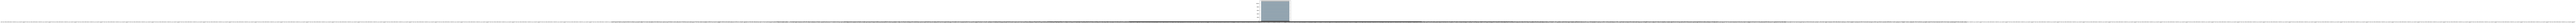

In [55]:
(df["neg"] * 100).hist(bins = 1)

In [61]:
# Weird input row 3008
df[df["neg"] == "excess hair growth"]["neu"]

3008    acne
Name: neu, dtype: object